## Example script to convert USGS streamflow data into a calibration file

In [10]:
%matplotlib inline
import os
from matplotlib import pylab
import sys
from os.path import dirname
parent_dir = dirname(dirname(os.getcwd()))
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from datetime import date
import pandas as pd
import numpy as np
import time
import sys

watershed_name = 'sf_leggett'
area = 6.42317051e12 #area of leggett, sqcm
conversion = 2.44657555e9  #convert cfs to cm^3/day


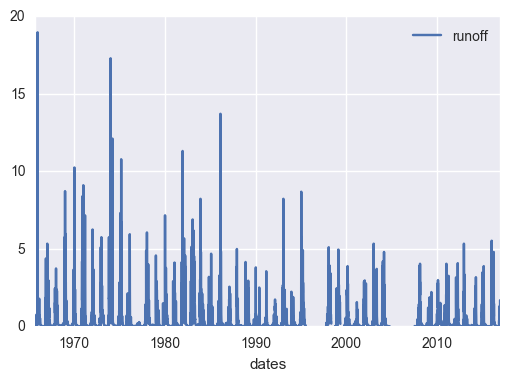

In [13]:
df = pd.read_csv('dv.txt', sep='\t', header=28)
df.columns = ['usgs', 'gagenum', 'datestring', 'discharge', 'a']
datestrings = df.datestring
dates = pd.to_datetime(datestrings)
df['dates'] = dates
df = df.set_index('dates')
discharge = df.discharge
df = df.drop(df.columns, axis=1)
df['runoff'] = discharge*conversion/area
pickle.dump(df, open(os.path.join(parent_dir, 'calibration_data', watershed_name+'_runoff.p'), 'wb'))
df.plot()